# **Lead scoring Assignment**

***Imports***

In [844]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

import warnings
warnings.filterwarnings('ignore')

### **Step 1 : Reading and understanding the data**

In [845]:
#import data file
df_lead=pd.read_csv("Leads.csv")
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [846]:
df_lead.shape

(9240, 37)

In [847]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### **Step 2 : Preparing the data**

In [848]:
# need to drop IDs
id_col = ['Prospect ID', 'Lead Number']
df_lead.drop(id_col, axis=1, inplace=True)
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [849]:
df_lead.isnull().sum()
100*(df_lead.isnull().sum()/len(df_lead.index)), 2

(Lead Origin                                       0.000000
 Lead Source                                       0.389610
 Do Not Email                                      0.000000
 Do Not Call                                       0.000000
 Converted                                         0.000000
 TotalVisits                                       1.482684
 Total Time Spent on Website                       0.000000
 Page Views Per Visit                              1.482684
 Last Activity                                     1.114719
 Country                                          26.634199
 Specialization                                   15.562771
 How did you hear about X Education               23.885281
 What is your current occupation                  29.112554
 What matters most to you in choosing a course    29.318182
 Search                                            0.000000
 Magazine                                          0.000000
 Newspaper Article                      

In [850]:
#dropping columns which are having more than 40% null values
drop_null_cols=df_lead.columns

for i in drop_null_cols:
    if((100*(df_lead[i].isnull().sum()/len(df_lead.index))) >= 30):
        df_lead.drop(i, 1, inplace = True)

In [851]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [852]:
100*(df_lead.isnull().sum()/len(df_lead.index)), 2

(Lead Origin                                       0.000000
 Lead Source                                       0.389610
 Do Not Email                                      0.000000
 Do Not Call                                       0.000000
 Converted                                         0.000000
 TotalVisits                                       1.482684
 Total Time Spent on Website                       0.000000
 Page Views Per Visit                              1.482684
 Last Activity                                     1.114719
 Country                                          26.634199
 Specialization                                   15.562771
 How did you hear about X Education               23.885281
 What is your current occupation                  29.112554
 What matters most to you in choosing a course    29.318182
 Search                                            0.000000
 Magazine                                          0.000000
 Newspaper Article                      

In [853]:
# make 'Select' as NaN
df_lead = df_lead.replace('Select', np.nan)

In [854]:
df_lead.head

<bound method NDFrame.head of                   Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0     

***Converting binary variables (Yes/No) to 0/1***

In [855]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead[varlist] = df_lead[varlist].apply(binary_map)

In [856]:
df_lead.head

<bound method NDFrame.head of                   Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                         API      Olark Chat             0            0   
1                         API  Organic Search             0            0   
2     Landing Page Submission  Direct Traffic             0            0   
3     Landing Page Submission  Direct Traffic             0            0   
4     Landing Page Submission          Google             0            0   
...                       ...             ...           ...          ...   
9235  Landing Page Submission  Direct Traffic             1            0   
9236  Landing Page Submission  Direct Traffic             0            0   
9237  Landing Page Submission  Direct Traffic             1            0   
9238  Landing Page Submission          Google             0            0   
9239  Landing Page Submission  Direct Traffic             0            0   

      Converted  TotalVisits  Total Time Spent on Website

In [857]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

***Checking feuture values which can be merged for easier and better predictions***

In [858]:
100*df_lead["Country"].value_counts(normalize=True, dropna=False)

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [859]:
df_lead["Country_new"] = np.where(df_lead["Country"].isin(["India", "NaN"]), df_lead["Country"], "Others")
df_lead.drop('Country', axis=1, inplace=True)

In [860]:
df_lead.head

<bound method NDFrame.head of                   Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                         API      Olark Chat             0            0   
1                         API  Organic Search             0            0   
2     Landing Page Submission  Direct Traffic             0            0   
3     Landing Page Submission  Direct Traffic             0            0   
4     Landing Page Submission          Google             0            0   
...                       ...             ...           ...          ...   
9235  Landing Page Submission  Direct Traffic             1            0   
9236  Landing Page Submission  Direct Traffic             0            0   
9237  Landing Page Submission  Direct Traffic             1            0   
9238  Landing Page Submission          Google             0            0   
9239  Landing Page Submission  Direct Traffic             0            0   

      Converted  TotalVisits  Total Time Spent on Website

In [861]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Country_new'],
      dtype='object')

In [862]:
100*df_lead["Lead Source"].value_counts(normalize=True, dropna=False)

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [863]:
df_lead["Lead_Source_new"] = np.where(df_lead["Lead Source"].isin(["Google", "Direct Traffic", "Olark Chat", "Organic Search", "Reference", "Welingak Website", "Referral Sites"]), df_lead["Lead Source"], "Others")
df_lead.drop('Lead Source', axis=1, inplace=True)

In [864]:
100*df_lead["Lead Origin"].value_counts(normalize=True, dropna=False)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [865]:
df_lead["Lead_Origin_new"] = np.where(df_lead["Lead Origin"].isin(["Landing Page Submission", "API", "Lead Add Form"]), df_lead["Lead Origin"], "Others")
df_lead.drop('Lead Origin', axis=1, inplace=True)

In [866]:
100*df_lead["Lead_Origin_new"].value_counts(normalize=True, dropna=False)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead_Origin_new, dtype: float64

In [867]:
100*df_lead["Last Activity"].value_counts(normalize=True, dropna=False)

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [868]:
df_lead["Last_Activity_new"] = np.where(df_lead["Last Activity"].isin(["Email Opened", "SMS Sent", "Olark Chat Conversation", "Page Visited on Website", "Converted to Lead", "Email Bounced", "Email Link Clicked", "Form Submitted on Website", "Nan", "Unreachable"]), df_lead["Last Activity"], "Others")
df_lead.drop('Last Activity', axis=1, inplace=True)

In [869]:
100*df_lead["Last_Activity_new"].value_counts(normalize=True, dropna=False)

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.326840
Form Submitted on Website     1.255411
Unreachable                   1.006494
Name: Last_Activity_new, dtype: float64

In [870]:
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan, 'Not Mentioned')
100*df_lead["Specialization"].value_counts(normalize=True, dropna=False)

Not Mentioned                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [871]:
100*df_lead["How did you hear about X Education"].value_counts(normalize=True, dropna=False)

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [872]:
# dropping this column as most of the values are Nan
df_lead.drop('How did you hear about X Education', axis=1, inplace=True)

In [873]:
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Not Mentioned')
100*df_lead["What is your current occupation"].value_counts(normalize=True, dropna=False)

Unemployed              60.606061
Not Mentioned           29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [874]:
df_lead["occupation_new"] = np.where(df_lead["What is your current occupation"].isin(["Other", "Housewife", "Businessman"]), "Others", df_lead["What is your current occupation"])
df_lead.drop('What is your current occupation', axis=1, inplace=True)

In [875]:
100*df_lead["occupation_new"].value_counts(normalize=True, dropna=False)

Unemployed              60.606061
Not Mentioned           29.112554
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: occupation_new, dtype: float64

In [876]:
df_lead['What matters most to you in choosing a course'] = df_lead['What matters most to you in choosing a course'].replace(np.nan, 'Not Mentioned')
100*df_lead["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False)

Better Career Prospects      70.649351
Not Mentioned                29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [877]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   9240 non-null   int64  
 1   Do Not Call                                    9240 non-null   int64  
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9103 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9103 non-null   float64
 6   Specialization                                 9240 non-null   object 
 7   What matters most to you in choosing a course  9240 non-null   object 
 8   Search                                         9240 non-null   int64  
 9   Magazine                                       9240 

In [878]:
100*(df_lead.isnull().sum()/len(df_lead.index)), 2

(Do Not Email                                      0.000000
 Do Not Call                                       0.000000
 Converted                                         0.000000
 TotalVisits                                       1.482684
 Total Time Spent on Website                       0.000000
 Page Views Per Visit                              1.482684
 Specialization                                    0.000000
 What matters most to you in choosing a course     0.000000
 Search                                            0.000000
 Magazine                                          0.000000
 Newspaper Article                                 0.000000
 X Education Forums                                0.000000
 Newspaper                                         0.000000
 Digital Advertisement                             0.000000
 Through Recommendations                           0.000000
 Receive More Updates About Our Courses            0.000000
 Update me on Supply Chain Content      

In [879]:
# dropping Lead Profile and City for null values
df_lead.drop(['Lead Profile', 'City'], axis=1, inplace=True)

In [880]:
100*(df_lead.isnull().sum()/len(df_lead.index)), 2

(Do Not Email                                     0.000000
 Do Not Call                                      0.000000
 Converted                                        0.000000
 TotalVisits                                      1.482684
 Total Time Spent on Website                      0.000000
 Page Views Per Visit                             1.482684
 Specialization                                   0.000000
 What matters most to you in choosing a course    0.000000
 Search                                           0.000000
 Magazine                                         0.000000
 Newspaper Article                                0.000000
 X Education Forums                               0.000000
 Newspaper                                        0.000000
 Digital Advertisement                            0.000000
 Through Recommendations                          0.000000
 Receive More Updates About Our Courses           0.000000
 Update me on Supply Chain Content                0.0000

In [881]:
df_lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

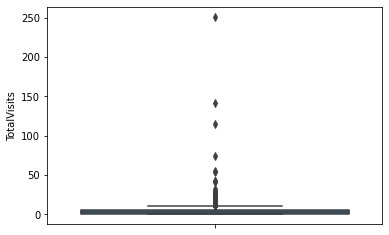

In [882]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_lead['TotalVisits'])
plt.show()

In [883]:
# as the percentage of null values are very less so dropping the null values
df_lead.dropna(subset=['TotalVisits', 'Page Views Per Visit'], inplace=True)

In [884]:
df_lead.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.0,9103.0,9103.0,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.0,0.000220,0.000110,0.000110,0.000439,0.000769,0.0,0.0,0.0,0.0,0.317258
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.0,0.014822,0.010481,0.010481,0.020959,0.027721,0.0,0.0,0.0,0.0,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [885]:
df_lead.rename(columns = {'What matters most to you in choosing a course' : 'course_choosing_matter', 'Last Notable Activity' : 'Last_Notable_Activity'}, inplace = True)

In [886]:
df_lead.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'course_choosing_matter', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last_Notable_Activity',
       'Country_new', 'Lead_Source_new', 'Lead_Origin_new',
       'Last_Activity_new', 'occupation_new'],
      dtype='object')

In [887]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9103 non-null   int64  
 1   Do Not Call                               9103 non-null   int64  
 2   Converted                                 9103 non-null   int64  
 3   TotalVisits                               9103 non-null   float64
 4   Total Time Spent on Website               9103 non-null   int64  
 5   Page Views Per Visit                      9103 non-null   float64
 6   Specialization                            9103 non-null   object 
 7   course_choosing_matter                    9103 non-null   object 
 8   Search                                    9103 non-null   int64  
 9   Magazine                                  9103 non-null   int64  
 10  Newspaper Article                   

***creating dummy variables for categorical values***

In [888]:
cat_col_list = ['Specialization' , 'course_choosing_matter', 'Last_Notable_Activity', 'Country_new', 'Lead_Source_new', 'Lead_Origin_new', 'Last_Activity_new', 'occupation_new']
for i in cat_col_list:
    #create_dummy_func(df_lead, i)
    df_lead_dummy = pd.get_dummies(df_lead[i], prefix=i)
    df_lead = pd.concat([df_lead,df_lead_dummy], axis=1)
    df_lead.drop(i, axis=1, inplace=True)

In [889]:
df_lead.head

<bound method NDFrame.head of       Do Not Email  Do Not Call  Converted  TotalVisits  \
0                0            0          0          0.0   
1                0            0          0          5.0   
2                0            0          1          2.0   
3                0            0          0          1.0   
4                0            0          1          2.0   
...            ...          ...        ...          ...   
9235             1            0          1          8.0   
9236             0            0          0          2.0   
9237             1            0          0          2.0   
9238             0            0          1          3.0   
9239             0            0          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                               0                  0.00       0         0   
1                             674                  2.50       0         0   
2                            1

In [890]:
df_lead.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       '

In [891]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9103 non-null   int64  
 1   Do Not Call                                         9103 non-null   int64  
 2   Converted                                           9103 non-null   int64  
 3   TotalVisits                                         9103 non-null   float64
 4   Total Time Spent on Website                         9103 non-null   int64  
 5   Page Views Per Visit                                9103 non-null   float64
 6   Search                                              9103 non-null   int64  
 7   Magazine                                            9103 non-null   int64  
 8   Newspaper Article                                   9103 non-null   int64  
 9

### **Step 3: Test-Train Split**

In [892]:
from sklearn.model_selection import train_test_split
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [893]:
X = df_lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last_Activity_new_Olark Chat Conversation,Last_Activity_new_Others,Last_Activity_new_Page Visited on Website,Last_Activity_new_SMS Sent,Last_Activity_new_Unreachable,occupation_new_Not Mentioned,occupation_new_Others,occupation_new_Student,occupation_new_Unemployed,occupation_new_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [894]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [895]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9103 non-null   int64  
 1   Do Not Call                                         9103 non-null   int64  
 2   Converted                                           9103 non-null   int64  
 3   TotalVisits                                         9103 non-null   float64
 4   Total Time Spent on Website                         9103 non-null   int64  
 5   Page Views Per Visit                                9103 non-null   float64
 6   Search                                              9103 non-null   int64  
 7   Magazine                                            9103 non-null   int64  
 8   Newspaper Article                                   9103 non-null   int64  
 9

In [896]:
df_lead.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last_Activity_new_Olark Chat Conversation,Last_Activity_new_Others,Last_Activity_new_Page Visited on Website,Last_Activity_new_SMS Sent,Last_Activity_new_Unreachable,occupation_new_Not Mentioned,occupation_new_Others,occupation_new_Student,occupation_new_Unemployed,occupation_new_Working Professional
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,...,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.0,0.000220,0.000110,...,0.106778,0.011315,0.070306,0.300780,0.009887,0.294738,0.003515,0.022740,0.604416,0.074591
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.0,0.014822,0.010481,...,0.308848,0.105774,0.255677,0.458622,0.098945,0.455950,0.059189,0.149081,0.489003,0.262744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Step 4: Feature Scaling**

In [897]:
from sklearn.preprocessing import StandardScaler

In [898]:
scaler = StandardScaler()
numeric_col_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[numeric_col_list] = scaler.fit_transform(X_train[numeric_col_list])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last_Activity_new_Olark Chat Conversation,Last_Activity_new_Others,Last_Activity_new_Page Visited on Website,Last_Activity_new_SMS Sent,Last_Activity_new_Unreachable,occupation_new_Not Mentioned,occupation_new_Others,occupation_new_Student,occupation_new_Unemployed,occupation_new_Working Professional
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,0,0,0.301082,-0.571257,0.061483,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1566,0,0,2.074000,1.393834,0.517039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### **Step 5: Feature Selection Using RFE**

In [899]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [900]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True])

In [901]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Search', False, 64),
 ('Magazine', False, 69),
 ('Newspaper Article', False, 42),
 ('X Education Forums', False, 40),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 33),
 ('Through Recommendations', False, 26),
 ('Receive More Updates About Our Courses', False, 66),
 ('Update me on Supply Chain Content', False, 68),
 ('Get updates on DM Content', False, 70),
 ('I agree to pay the amount through cheque', False, 71),
 ('A free copy of Mastering The Interview', False, 45),
 ('Specialization_Banking, Investment And Insurance', False, 30),
 ('Specialization_Business Administration', False, 59),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', False, 58),
 ('Specialization_Finance Management', False, 65),
 ('Specialization_Healthcare Management', False, 57),
 ('Specialization_Hospitality

In [902]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'course_choosing_matter_Not Mentioned',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable',
       'Lead_Source_new_Olark Chat', 'Lead_Source_new_Welingak Website',
       'Lead_Origin_new_API', 'Lead_Origin_new_Landing Page Submission',
       'Lead_Origin_new_Lead Add Form', 'Last_Activity_new_Converted to Lead',
       'Last_Activity_new_Olark Chat Conversation', 'Last_Activity_new_Others',
       'occupation_new_Working Professional'],
      dtype='object')

In [903]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.7
Date:                Mon, 19 Jun 2023   Deviance:                       5145.4
Time:                        13:48:20   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1506      0.442      0.341      0.733      -0.716       1.017
Do Not Email                                      -1.5875      0.171     -9.298      0.000      -1.922      -1.253
Total Time Spent on Website                        1.1109      0.041     27.334      0.000       1.031       1.191
course_choosing_matter_Not Mentioned              -1.1585      0.088    -13.104      0.000      -1.332      -0.985
Last_Notable_Activity_Had a Phone Conversation     2.0090      1.227      1.637      0.102      -0.396       4.414
Last_Notable_Activity_SMS Sent                     1.4230      0.081     17.627      0.000       1.265       1.581
Last_Notable_Activity_Unreachable                  1.8851      0.516      3.655      0.000       0.874       2.896
Lead_Source_new_Olark Chat                         1.0532      0.123      8.570      0.000       0.812       1.294
Lead_Source_new_Welingak Website                   1.9517      0.754      2.588      0.010       0.473       3.430
Lead_Origin_new_API                               -1.0158      0.451     -2.253      0.024      -1.900      -0.132
Lead_Origin_new_Landing Page Submission           -1.2956      0.447     -2.898      0.004      -2.172      -0.419
Lead_Origin_new_Lead Add Form                      2.5007      0.489      5.109      0.000       1.541       3.460
Last_Activity_new_Converted to Lead               -1.3366      0.212     -6.290      0.000      -1.753      -0.920
Last_Activity_new_Olark Chat Conversation         -1.3928      0.164     -8.488      0.000      -1.714      -1.071
Last_Activity_new_Others                           1.0340      0.346      2.988      0.003       0.356       1.712
occupation_new_Working Professional                2.5467      0.189     13.499      0.000       2.177       2.916
==================================================================================================================
"""

In [904]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,246.28
10,Lead_Origin_new_Landing Page Submission,62.07
9,Lead_Origin_new_API,60.25
11,Lead_Origin_new_Lead Add Form,16.80
7,Lead_Source_new_Olark Chat,1.93
2,Total Time Spent on Website,1.31
8,Lead_Source_new_Welingak Website,1.30
13,Last_Activity_new_Olark Chat Conversation,1.30
14,Last_Activity_new_Others,1.19
3,course_choosing_matter_Not Mentioned,1.14


*Dropping Lead_Origin_new_Landing Page Submission feature as it's VIF and P-values both are high and re-checking after that*

In [905]:
rfe_col = rfe_col.drop('Lead_Origin_new_Landing Page Submission', 1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'course_choosing_matter_Not Mentioned',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable',
       'Lead_Source_new_Olark Chat', 'Lead_Source_new_Welingak Website',
       'Lead_Origin_new_API', 'Lead_Origin_new_Lead Add Form',
       'Last_Activity_new_Converted to Lead',
       'Last_Activity_new_Olark Chat Conversation', 'Last_Activity_new_Others',
       'occupation_new_Working Professional'],
      dtype='object')

In [906]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.3
Date:                Mon, 19 Jun 2023   Deviance:                       5152.5
Time:                        13:48:20   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1250      0.060    -18.657      0.000      -1.243      -1.007
Do Not Email                                      -1.5920      0.170     -9.342      0.000      -1.926      -1.258
Total Time Spent on Website                        1.1002      0.040     27.269      0.000       1.021       1.179
course_choosing_matter_Not Mentioned              -1.1625      0.088    -13.172      0.000      -1.335      -0.990
Last_Notable_Activity_Had a Phone Conversation     1.9981      1.226      1.630      0.103      -0.405       4.401
Last_Notable_Activity_SMS Sent                     1.4120      0.080     17.543      0.000       1.254       1.570
Last_Notable_Activity_Unreachable                  1.8714      0.515      3.631      0.000       0.861       2.882
Lead_Source_new_Olark Chat                         1.0408      0.123      8.490      0.000       0.801       1.281
Lead_Source_new_Welingak Website                   1.9531      0.754      2.589      0.010       0.475       3.431
Lead_Origin_new_API                                0.2683      0.090      2.989      0.003       0.092       0.444
Lead_Origin_new_Lead Add Form                      3.7698      0.224     16.814      0.000       3.330       4.209
Last_Activity_new_Converted to Lead               -1.3449      0.212     -6.338      0.000      -1.761      -0.929
Last_Activity_new_Olark Chat Conversation         -1.3955      0.164     -8.514      0.000      -1.717      -1.074
Last_Activity_new_Others                           1.0264      0.346      2.969      0.003       0.349       1.704
occupation_new_Working Professional                2.5516      0.189     13.525      0.000       2.182       2.921
==================================================================================================================
"""

In [907]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.26
7,Lead_Source_new_Olark Chat,1.93
9,Lead_Origin_new_API,1.68
10,Lead_Origin_new_Lead Add Form,1.50
2,Total Time Spent on Website,1.31
8,Lead_Source_new_Welingak Website,1.30
12,Last_Activity_new_Olark Chat Conversation,1.30
13,Last_Activity_new_Others,1.19
3,course_choosing_matter_Not Mentioned,1.14
4,Last_Notable_Activity_Had a Phone Conversation,1.14


VIFs and P values for all features are less now.

### **Step 6 - Start prediction model**

In [908]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.871156
5520    0.122039
1962    0.147613
1566    0.950739
9170    0.313217
5097    0.124814
8954    0.524532
309     0.173091
5519    0.369212
1050    0.525458
dtype: float64

In [909]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87115621, 0.12203852, 0.14761315, 0.95073898, 0.31321654,
       0.12481438, 0.52453179, 0.17309123, 0.36921225, 0.52545792])

In [910]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.871156
1,0,0.122039
2,0,0.147613
3,1,0.950739
4,0,0.313217


*Checking with cut-off =0.5*

In [911]:
y_train_pred_final['Converted_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_predicted
0,0,0.871156,1
1,0,0.122039,0
2,0,0.147613,0
3,1,0.950739,1
4,0,0.313217,0


*validaing using different metrics*

In [912]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_predicted )
confusion

array([[3515,  438],
       [ 725, 1694]], dtype=int64)

In [913]:
accuracy_converted = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_predicted)
accuracy_converted

0.8174827369742624

In [914]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [915]:
sensitivity_converted = TP / float(TP+FN)
sensitivity_converted

0.7002893757751136

In [916]:
specificity_converted = TN / float(TN+FP)
specificity_converted

0.8891980774095624

In [917]:
FPR = FP/ float(TN+FP)
FPR

0.11080192259043764

In [918]:
positive_predicted_value = TP / float(TP+FP)
positive_predicted_value

0.7945590994371482

In [919]:
negative_predicted_value = TN / float(TN+FN)
negative_predicted_value

0.8290094339622641

*ROC Curve*

In [920]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

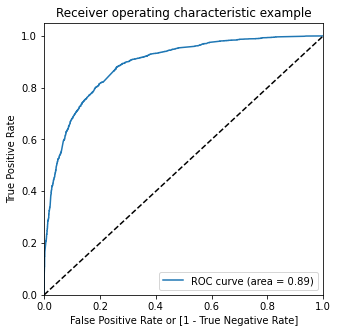

In [921]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

*Finding optimal cut-off*

In [922]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.871156,1,1,1,1,1,1,1,1,1,1,0
1,0,0.122039,0,1,1,0,0,0,0,0,0,0,0
2,0,0.147613,0,1,1,0,0,0,0,0,0,0,0
3,1,0.950739,1,1,1,1,1,1,1,1,1,1,1
4,0,0.313217,0,1,1,1,1,0,0,0,0,0,0


In [923]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.602323  0.979330  0.371616
0.2   0.2  0.764438  0.911120  0.674677
0.3   0.3  0.793001  0.866060  0.748292
0.4   0.4  0.813089  0.770566  0.839110
0.5   0.5  0.817483  0.700289  0.889198
0.6   0.6  0.810264  0.630012  0.920567
0.7   0.7  0.789077  0.524597  0.950923
0.8   0.8  0.763653  0.428690  0.968631
0.9   0.9  0.714846  0.268293  0.988110


*accuracy, sensitivity and specificity curve*

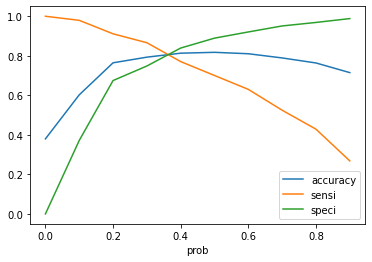

In [924]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

According to the above curve, cut-off point is ~ 0.4. For this case we are considering cut-off = 3.8

In [925]:
y_train_pred_final['Converted_final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Converted_final_predicted
0,0,0.871156,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.122039,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.147613,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.950739,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.313217,0,1,1,1,1,0,0,0,0,0,0,0


In [926]:
accuracy_updated = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_final_predicted)
accuracy_updated

0.8105775266792216

In [927]:
confusion_updated = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_final_predicted )
confusion_updated

array([[3272,  681],
       [ 526, 1893]], dtype=int64)

In [928]:
TP = confusion_updated[1,1] # true positive 
TN = confusion_updated[0,0] # true negatives
FP = confusion_updated[0,1] # false positives
FN = confusion_updated[1,0] # false negatives
sensitivity_converted_updated = TP / float(TP+FN)
print(f"Updated sensitivity : {sensitivity_converted_updated}")
specificity_converted_updated = TN / float(TN+FP)
print(f"Updated specificity : {specificity_converted_updated}")
FPR_converted_updated = FP/ float(TN+FP)
print(f"Updated FPR : {FPR_converted_updated}")
positive_predicted_value_converted_updated = TP / float(TP+FP)
print(f"Updated positive_predicted_value : {positive_predicted_value_converted_updated}")
negative_predicted_value_converted_updated = TN / float(TN+ FN)
print(f"Updated negative_predicted_value : {negative_predicted_value_converted_updated}")

Updated sensitivity : 0.7825547747002893
Updated specificity : 0.82772577789021
Updated FPR : 0.17227422210979004
Updated positive_predicted_value : 0.7354312354312355
Updated negative_predicted_value : 0.861506055818852


*precision and recall*

In [929]:
from sklearn.metrics import precision_score, recall_score
precision_Converted_final = precision_score(y_train_pred_final.Converted, y_train_pred_final.Converted_final_predicted)
print(f"Updated Precision : {precision_Converted_final}")
recall_Converted_final = recall_score(y_train_pred_final.Converted, y_train_pred_final.Converted_final_predicted)
print(f"Updated Recall : {recall_Converted_final}")

Updated Precision : 0.7354312354312355
Updated Recall : 0.7825547747002893


*precision recall trade-off*

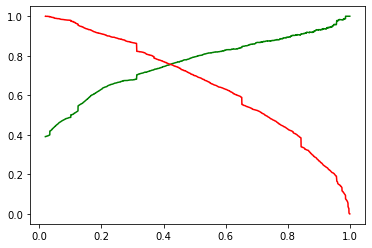

In [930]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### **Step 7 - Making predictions on test set**

In [931]:
X_test[numeric_col_list] = scaler.transform(X_test[numeric_col_list])

In [932]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last_Activity_new_Olark Chat Conversation,Last_Activity_new_Others,Last_Activity_new_Page Visited on Website,Last_Activity_new_SMS Sent,Last_Activity_new_Unreachable,occupation_new_Not Mentioned,occupation_new_Others,occupation_new_Student,occupation_new_Unemployed,occupation_new_Working Professional
3504,0,0,-0.092900,-0.103815,0.289261,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4050,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7201,1,0,-0.289891,0.424120,-0.166294,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1196,0,0,0.104091,-0.105648,0.744816,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8219,0,0,0.695064,-0.428274,-0.280183,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [933]:
X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,course_choosing_matter_Not Mentioned,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Lead_Source_new_Olark Chat,Lead_Source_new_Welingak Website,Lead_Origin_new_API,Lead_Origin_new_Lead Add Form,Last_Activity_new_Converted to Lead,Last_Activity_new_Olark Chat Conversation,Last_Activity_new_Others,occupation_new_Working Professional
3504,0,-0.103815,0,0,0,0,0,0,0,0,0,0,0,0
4050,0,-0.881052,0,0,1,0,0,0,0,1,0,0,0,0
7201,1,0.424120,0,0,1,0,0,0,0,0,0,0,0,0
1196,0,-0.105648,0,0,0,0,0,0,0,0,0,0,0,0
8219,0,-0.428274,0,0,0,0,0,0,0,0,0,0,0,0


In [934]:
X_test_sm = sm.add_constant(X_test)

In [935]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.224578
4050    0.956377
7201    0.301886
1196    0.224227
8219    0.168521
8747    0.124814
9048    0.252861
6524    0.148376
7693    0.121557
8187    0.956377
dtype: float64

In [936]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.224578
4050,0.956377
7201,0.301886
1196,0.224227
8219,0.168521


In [937]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [938]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.224578
1,1,0.956377
2,0,0.301886
3,0,0.224227
4,1,0.168521


In [939]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.224578
1,1,0.956377
2,0,0.301886
3,0,0.224227
4,1,0.168521


In [940]:
y_pred_final['Converted_final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [941]:
y_pred_final.head()

,Converted,Converted_Prob,Converted_final_predicted
0,0,0.224578,0
1,1,0.956377,1
2,0,0.301886,0
3,0,0.224227,0
4,1,0.168521,0


In [942]:
accuracy_test_set = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Converted_final_predicted)
print(f"Test set accuracy : {accuracy_updated}")
confusion_test_set = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Converted_final_predicted )
print(f"Test set confusion matrix : {confusion_test_set}")

TP = confusion_test_set[1,1] # true positive 
TN = confusion_test_set[0,0] # true negatives
FP = confusion_test_set[0,1] # false positives
FN = confusion_test_set[1,0] # false negatives
sensitivity_converted_test_set = TP / float(TP+FN)
print(f"Test set sensitivity : {sensitivity_converted_test_set}")
specificity_converted_test_set = TN / float(TN+FP)
print(f"Test set specificity : {specificity_converted_test_set}")
FPR_converted_test_set = FP/ float(TN+FP)
print(f"Test set FPR : {FPR_converted_test_set}")
positive_predicted_value_converted_test_set = TP / float(TP+FP)
print(f"Test set positive_predicted_value : {positive_predicted_value_converted_test_set}")
negative_predicted_value_converted_test_set = TN / float(TN+ FN)
print(f"Test set negative_predicted_value : {negative_predicted_value_converted_test_set}")

Test set accuracy : 0.8105775266792216
Test set confusion matrix : [[1400  289]
 [ 217  825]]
Test set sensitivity : 0.791746641074856
Test set specificity : 0.8288928359976317
Test set FPR : 0.17110716400236828
Test set positive_predicted_value : 0.7405745062836625
Test set negative_predicted_value : 0.8658008658008658


In [943]:
from sklearn.metrics import precision_score, recall_score
precision_Converted_final_test_set = precision_score(y_pred_final.Converted, y_pred_final.Converted_final_predicted)
print(f"Test set Precision : {precision_Converted_final_test_set}")
recall_Converted_final_test_set = recall_score(y_pred_final.Converted, y_pred_final.Converted_final_predicted)
print(f"Test set Recall : {recall_Converted_final_test_set}")

Test set Precision : 0.7405745062836625
Test set Recall : 0.791746641074856


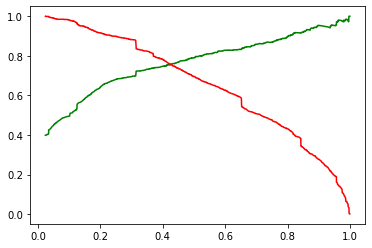

In [944]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()